E:\ProgramData\Anaconda3_1\envs\tensorflow-1-5\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ProgramData\Anaconda3_1\envs\tensorflow-1-5\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ProgramData\Anaconda3_1\envs\tensorflow-1-5\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\ProgramData\Anaconda3_1\envs\tensorfl

-----"第"0"次的迭代值"------
[array([[1.95],
       [1.99]], dtype=float32), 1.41]
-----"第"100"次的迭代值"------
[array([[ 2.9388034],
       [-0.6417622]], dtype=float32), 7.5024066]
-----"第"200"次的迭代值"------
[array([[ 2.1817584 ],
       [-0.35411417]], dtype=float32), 8.839961]
-----"第"300"次的迭代值"------
[array([[ 1.8715947 ],
       [-0.22765213]], dtype=float32), 9.346234]
-----"第"400"次的迭代值"------
[array([[ 1.750861 ],
       [-0.1783222]], dtype=float32), 9.542803]
-----"第"500"次的迭代值"------
[array([[ 1.7042251],
       [-0.1592657]], dtype=float32), 9.618724]
Instructions for updating:
Use standard file APIs to delete files with this prefix.


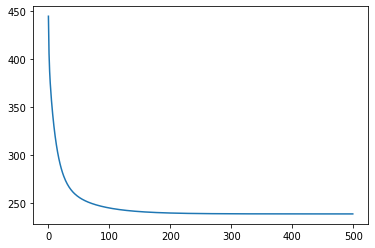

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# xyz坐标内的点
xy=tf.placeholder(tf.float32,[None, 2])
z=tf.placeholder(tf.float32,[None,1])

#初始化 z= w1*x + w2*y + b 中的 w1, w2, b
w=tf.Variable(tf.constant([[1],[1]], tf.float32), dtype=tf.float32 , name='w')
b=tf.Variable(1.0, dtype=tf.float32 , name='b')

# 损失函数
loss = tf.reduce_sum(tf.square( z- (tf.matmul(xy , w) + b )))
# 创建会话
session = tf.Session()
session.run(tf.global_variables_initializer())

# 梯度下降法
opti = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

#记录每一次迭代后的平均平方误差
MSE=[]

#训练数据
xy_train=np.array([
    [1,1],
    [2,1],
    [3,2],
    [1,2],
    [4,5],
    [5,8]
] ,np.float32)

z_train = np.array([
    [8],
    [12],
    [10],
    [14],
    [28],
    [10]
] ,np.float32)

# 声明一个tf.train.Saver类
saver = tf.train.Saver()

#训练模型, 500次
for i in range(500):
    # 梯度下降
    session.run(opti,feed_dict={xy:xy_train,z:z_train})
    #计算每一次迭代的损失值, 并append到列表中进行保存
    MSE.append(session.run(loss,feed_dict={xy:xy_train,z:z_train}))
    #每隔100次打印w 和b 的值
    if i % 100 == 0:
        # 保存模型
        saver.save(session, './regression/regressionModel.ckpt', global_step=i)
        print('-----"第"'+str(i) + '"次的迭代值"------')
        print(session.run([w,b]))

#打印第500次(最后)的迭代值
print('-----"第"'+str(500) + '"次的迭代值"------')
print(session.run([w,b]))

saver.save(session, './regression/regressionModel.ckpt', global_step=i)

# 画出损失函数的值
plt.figure(1)
plt.plot(MSE)
plt.show()